# Problem Statement:
Car Data- Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Load the Cars Data and necesary modules file into Python DataFrame and view top 10 rows

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [3]:
df_cars_raw = pd.read_csv("cars.csv")
df_cars_raw.head(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


# Checking the datatypes of each column and the shape of the dataset. Performing descriptive analysis

In [4]:
df_cars_raw.shape

(398, 9)

In [5]:
df_cars_raw.describe().transpose()
# so we can see these metrics in a readable manner

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [6]:
df_cars_raw.info()
# looks like the hp column has unclean data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Checking for missing values incorrect data and performing imputations with mean, median and mode as necessary

In [7]:
df_cars_raw.isnull().values.any()
# apparently there are no nulls !! Good for us.

False

In [8]:
# apparently hp has some non-integer columns, we would need to examine that
hpIsDigit = pd.DataFrame(df_cars_raw.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
df_cars_raw[hpIsDigit['hp'] == False]
# these are the guilty rows

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [9]:
# Missing values have a'?''
# Replace missing values with NaN so it would be easier for us to pad later
df_cars_raw = df_cars_raw.replace('?', np.nan)
df_cars_raw[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [10]:
# lets see what median values look like for the dataset
df_cars_raw[['hp']].median()

hp    93.5
dtype: float64

In [11]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
# send all columns for cleaning except the last column
dff_cars = df_cars_raw.iloc[:,0:-1].apply(medianFiller,axis=0)

dff_cars['hp'] = dff_cars['hp'].astype('float64')  
# converting the hp column from object / string type to float

In [12]:
(dff_cars[['mpg']] < 0).any()
(dff_cars[['cyl']] < 0).any()
(dff_cars[['disp']] < 0).any()
(dff_cars[['hp']] < 0).any()
(dff_cars[['wt']] < 0).any()
(dff_cars[['acc']] < 0).any()
(dff_cars[['yr']] < 0).any()
(dff_cars[['origin']] < 0).any()

origin    False
dtype: bool

In [13]:
dff_cars.info()
# now we are all set, done with the cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null float64
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# Performing bi-variate analysis including correlation & pairplots

In [14]:
dff_cars.corr()
# checking the correlation

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


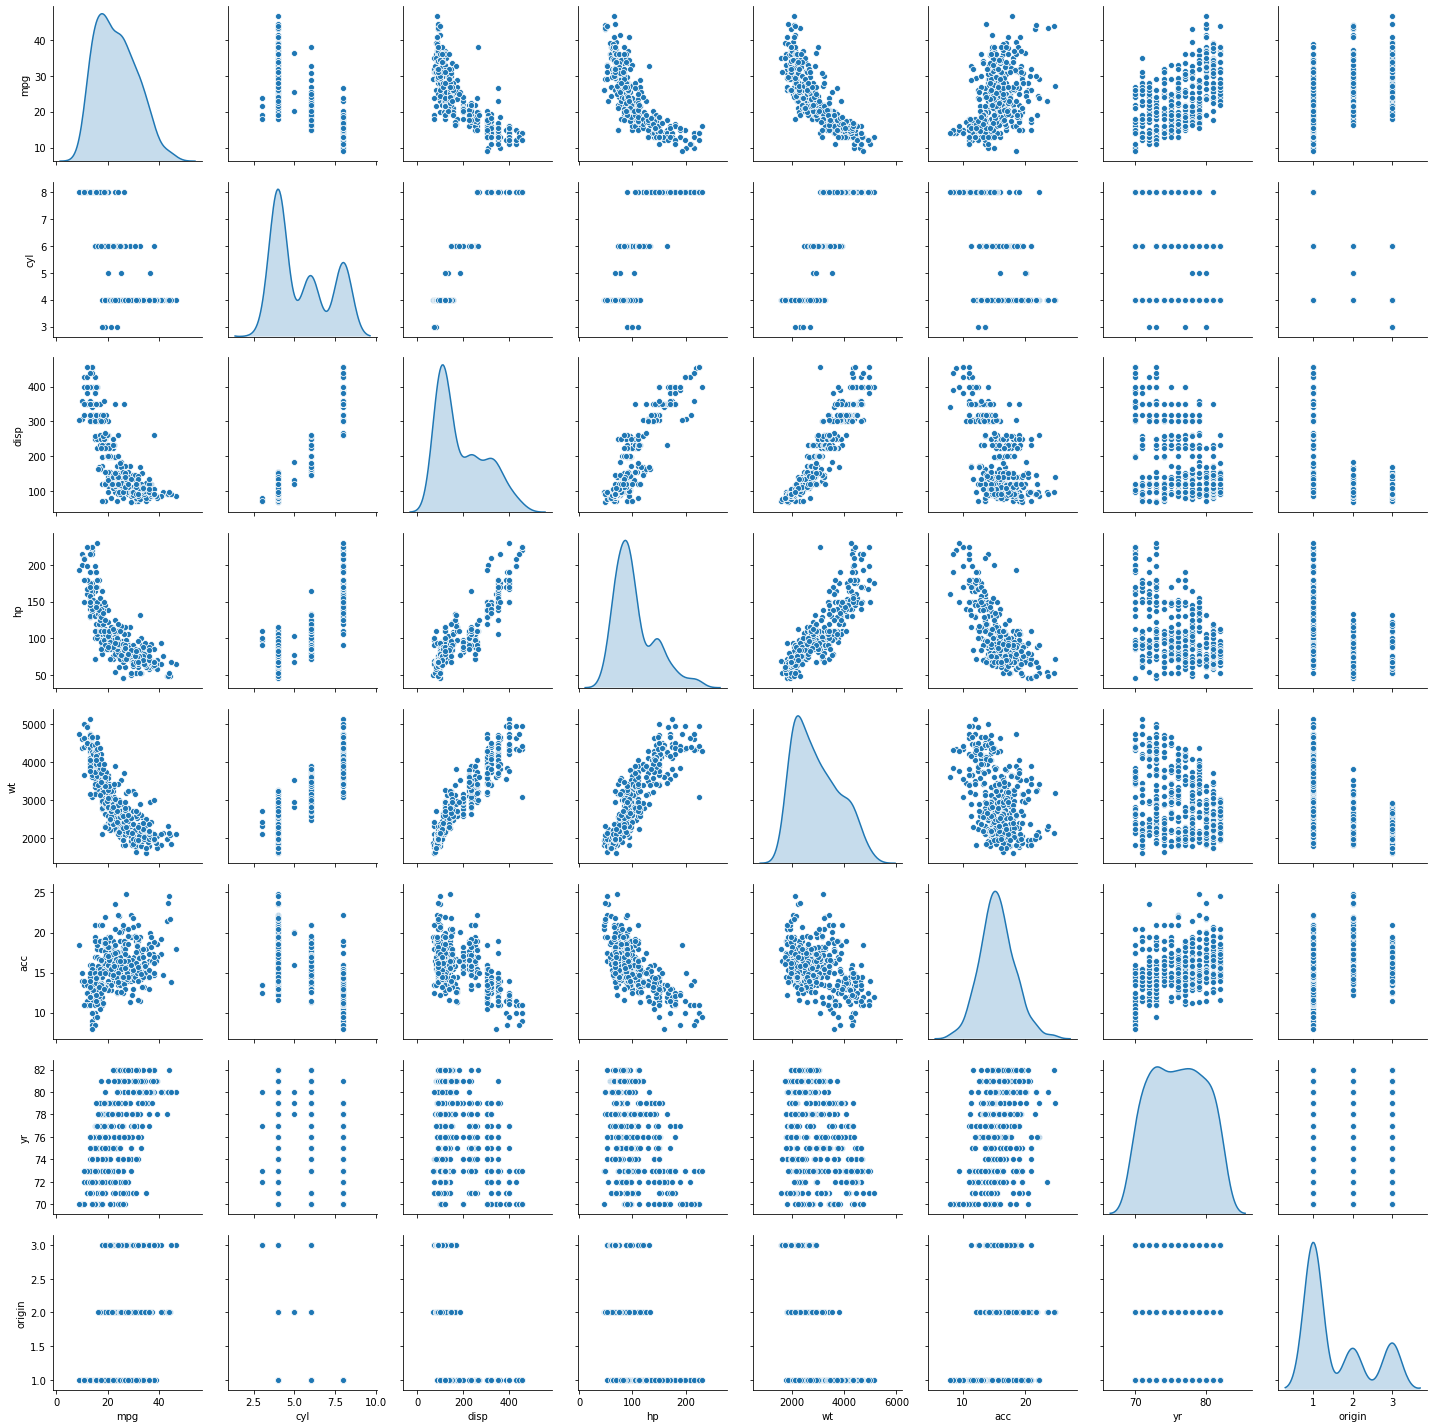

In [15]:
sns.pairplot(dff_cars, diag_kind='kde')
# from the below graph is does seem that 'cyl', 'disp', 'hp' may be candidates for fewer centroids

In [16]:
dff_cars_scld=dff_cars.apply(zscore)
# scaling the attributes

# Using the Elbow method with different distances, we determine the best cluster size

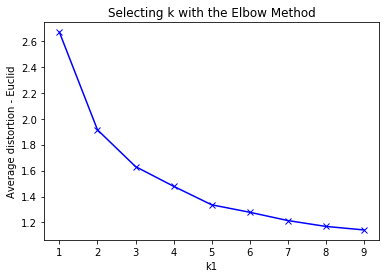

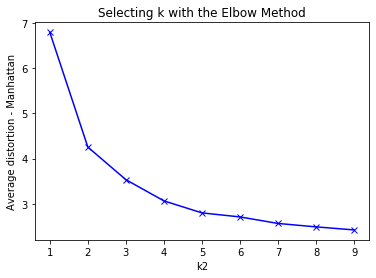

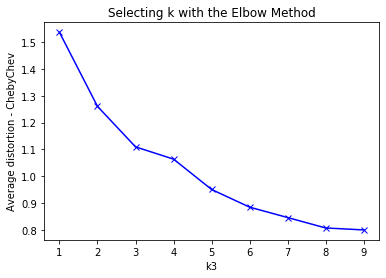

In [17]:
#Finding optimal no. of clusters
# here we use the Euclidean Distance to check the Elbow curve
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions_euclid=[]
meanDistortions_manhattan=[]
meanDistortions_chebychev=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dff_cars_scld)
    prediction=model.predict(dff_cars_scld)
    meanDistortions_euclid.append(sum(np.min(cdist(dff_cars_scld, model.cluster_centers_, 'euclidean'), axis=1)) / dff_cars_scld.shape[0])
    meanDistortions_manhattan.append(sum(np.min(cdist(dff_cars_scld, model.cluster_centers_, 'cityblock'), axis=1)) / dff_cars_scld.shape[0])
    meanDistortions_chebychev.append(sum(np.min(cdist(dff_cars_scld, model.cluster_centers_, 'chebyshev'), axis=1)) / dff_cars_scld.shape[0])

    
plt.plot(clusters, meanDistortions_euclid, 'bx-')
plt.xlabel('k1')
plt.ylabel('Average distortion - Euclid')
plt.title('Selecting k with the Elbow Method')
plt.show()

plt.plot(clusters, meanDistortions_manhattan, 'bx-')
plt.xlabel('k2')
plt.ylabel('Average distortion - Manhattan')
plt.title('Selecting k with the Elbow Method')
plt.show()

plt.plot(clusters, meanDistortions_chebychev, 'bx-')
plt.xlabel('k3')
plt.ylabel('Average distortion - ChebyChev')
plt.title('Selecting k with the Elbow Method')
plt.show()


# looks like cluster number 5 it starts to flatten out

# To calculate the Clusters for k=2, k=4 and k=6. We then use the Silhouette Method to gauge the effectiveness of the Cluster

In [18]:
# Let us first start with K = 2
kmeans_model=KMeans(2)
kmeans_model.fit(dff_cars_scld)
prediction=kmeans_model.predict(dff_cars_scld)

#Append the prediction 
dff_cars["GROUP"] = prediction
dff_cars_scld["GROUP"] = prediction
print("Groups Assigned : \n")
dff_cars_scld.head()
# this shows us the distribution across clusters for the scaled dataset

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,1


In [19]:
cars_clust_2 = dff_cars.groupby(['GROUP'])
cars_clust_2.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,28.735371,4.152838,115.155022,80.849345,2368.759825,16.464192,77.222707,1.982533
1,16.440237,7.218935,299.485207,136.085799,3785.698225,14.353846,74.366864,1.017751


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290E8EE71C8>,
      dtype=object)

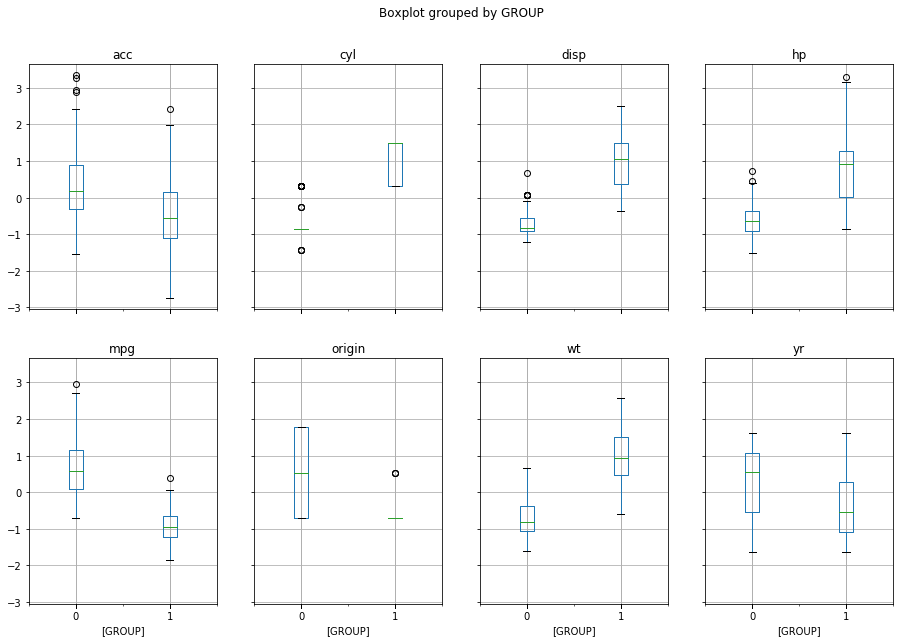

In [20]:
dff_cars_scld.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [21]:
from sklearn.metrics import silhouette_samples,silhouette_score

silhouette_vals = silhouette_samples(dff_cars_scld,prediction)
silhouette_avg = silhouette_score(dff_cars_scld,prediction)
print("The average silhouette_score for 2 centers is :", silhouette_avg)

The average silhouette_score for 2 centers is : 0.43185439187621577


In [22]:
# Let us first start with K = 3
kmeans_model=KMeans(3)
kmeans_model.fit(dff_cars_scld)
prediction=kmeans_model.predict(dff_cars_scld)

#Append the prediction 
dff_cars["GROUP"] = prediction
dff_cars_scld["GROUP"] = prediction
print("Groups Assigned : \n")
dff_cars_scld.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,2
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,2
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,2
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,2
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,2


In [26]:
cars_clust_3 = dff_cars.groupby(['GROUP'])
cars_clust_3.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,19.430588,6.211765,230.694118,102.382353,3272.352941,16.475294,75.917647,1.035294
1,28.999087,4.068493,111.737443,80.116438,2343.511416,16.500000,77.136986,2.027397
2,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290EB877A88>,
      dtype=object)

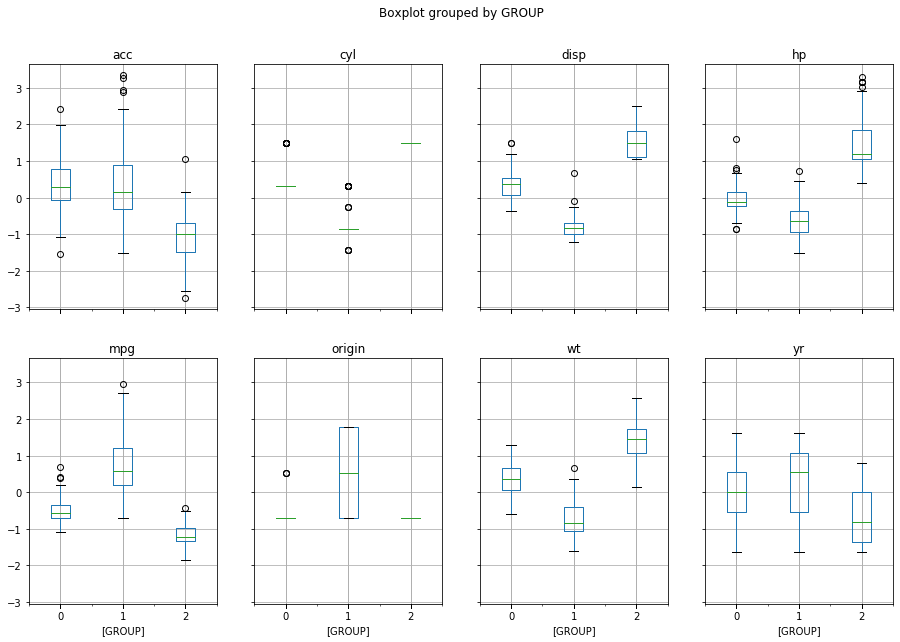

In [27]:
dff_cars_scld.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [28]:
silhouette_vals = silhouette_samples(dff_cars_scld,prediction)
silhouette_avg = silhouette_score(dff_cars_scld,prediction)
print("The average silhouette_score for 3 centers is :", silhouette_avg)

The average silhouette_score for 3 centers is : 0.3753403200824935


In [29]:
# Let us first start with K = 5
kmeans_model=KMeans(5)
kmeans_model.fit(dff_cars_scld)
prediction=kmeans_model.predict(dff_cars_scld)

#Append the prediction 
dff_cars["GROUP"] = prediction
dff_cars_scld["GROUP"] = prediction
print("Groups Assigned : \n")
dff_cars_scld.head()

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,2
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,2
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,2
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,2
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,2


In [30]:
cars_clust_5 = dff_cars.groupby(['GROUP'])
cars_clust_5.mean()

,mpg,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,,
0,19.430588,6.211765,230.694118,102.382353,3272.352941,16.475294,75.917647,1.035294
1,28.966667,4.079365,129.873016,80.984127,2552.539683,16.755556,79.634921,1.079365
2,14.429787,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,1.000000
3,34.137500,4.083333,99.527778,72.875000,2155.819444,16.734722,79.416667,2.763889
4,24.619048,4.047619,108.601190,85.672619,2347.619048,16.107143,73.309524,2.107143


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000290EC3A3748>,
      dtype=object)

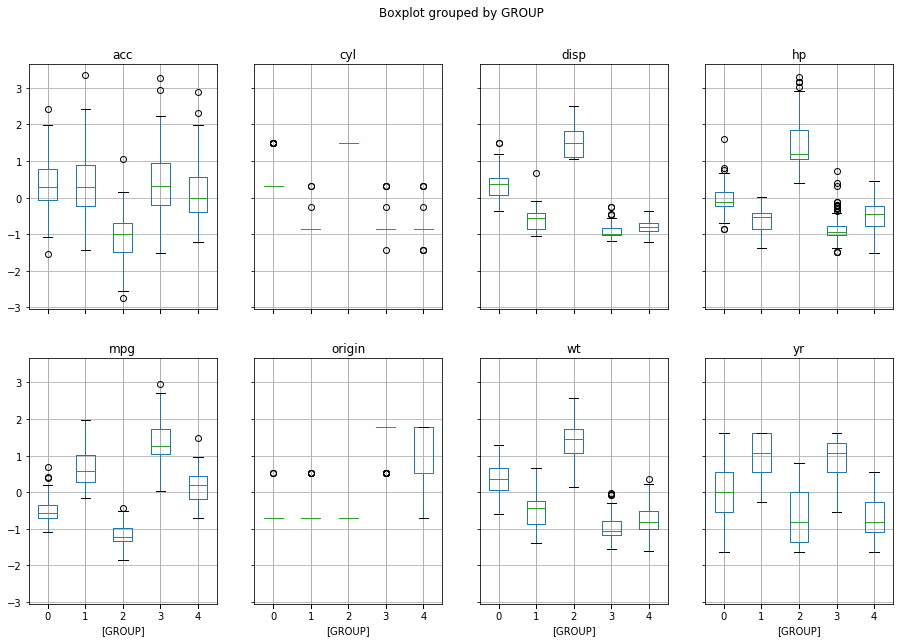

In [31]:
dff_cars_scld.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [32]:
silhouette_vals = silhouette_samples(dff_cars_scld,prediction)
silhouette_avg = silhouette_score(dff_cars_scld,prediction)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.42159660103125113


# Conclusions

Based on the various values of K tried upon above k=2, k=3 and k=5. It seems that Cluster 2 and 4 has got the highest Silhouette Values. So Cluster Size of 2 or 4 would give better accuracy